# EPL 데이터 분석

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.pylab import rcParams, style
rcParams['figure.figsize'] = 12, 8
rcParams['font.family'] = 'NanumGothic'
rcParams['font.size'] = 10

style.use('ggplot')

## 데이터 로드

In [2]:
# 2015-2016 잉글리시 프리미어 리그 경기기록
df = pd.read_excel('data/epl.xls')
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
1,E0,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88
2,E0,2015-08-08,Everton,Watford,2,2,D,0,1,A,...,1.96,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44
3,E0,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,...,1.67,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10
4,E0,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,...,2.01,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04


In [3]:
df['HomeTeam'].unique() # array

array(['Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United',
       'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom',
       'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool'],
      dtype=object)

In [4]:
df['HomeTeam'].value_counts()

Bournemouth       19
West Ham          19
Southampton       19
Swansea           19
Watford           19
Aston Villa       19
Liverpool         19
Chelsea           19
Stoke             19
Leicester         19
Tottenham         19
Arsenal           19
Norwich           19
Man United        19
Crystal Palace    19
Sunderland        19
Newcastle         19
West Brom         19
Everton           19
Man City          19
Name: HomeTeam, dtype: int64

In [5]:
df['Date']

0     2015-08-08
1     2015-08-08
2     2015-08-08
3     2015-08-08
4     2015-08-08
5     2015-08-08
6     2015-08-09
7     2015-08-09
8     2015-08-09
9     2015-08-10
10    2015-08-14
11    2015-08-15
12    2015-08-15
13    2015-08-15
14    2015-08-15
15    2015-08-15
16    2015-08-15
17    2015-08-16
18    2015-08-16
19    2015-08-17
20    2015-08-22
21    2015-08-22
22    2015-08-22
23    2015-08-22
24    2015-08-22
25    2015-08-22
26    2015-08-23
27    2015-08-23
28    2015-08-23
29    2015-08-24
         ...    
350   2016-04-30
351   2016-04-30
352   2016-05-01
353   2016-05-01
354   2016-05-01
355   2016-05-02
356   2016-05-07
357   2016-05-07
358   2016-05-07
359   2016-05-07
360   2016-05-07
361   2016-05-07
362   2016-05-07
363   2016-05-08
364   2016-05-08
365   2016-05-08
366   2016-05-10
367   2016-05-11
368   2016-05-11
369   2016-05-11
370   2016-05-15
371   2016-05-15
372   2016-05-15
373   2016-05-15
374   2016-05-15
375   2016-05-15
376   2016-05-15
377   2016-05-

In [6]:
# H / A 중복되어 들어 있나? 2015년 8월 8일 경기 기록 확인.
df[df['Date'] == '2015-08-08']

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
1,E0,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88
2,E0,2015-08-08,Everton,Watford,2,2,D,0,1,A,...,1.96,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44
3,E0,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,...,1.67,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10
4,E0,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,...,2.01,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04
5,E0,2015-08-08,Norwich,Crystal Palace,1,3,A,0,1,A,...,1.67,27,0.0,1.83,1.78,2.17,2.08,2.46,3.39,3.14


In [7]:
# FTHG = Full Time Home Team Goal
# FTAG = Full Time Away Team Goal
# FTR  = Full Time Result (H / A / D) : ( Home / Awaw / Draw )

df_w = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]
df_w.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2015-08-08,Bournemouth,Aston Villa,0,1,A
1,2015-08-08,Chelsea,Swansea,2,2,D
2,2015-08-08,Everton,Watford,2,2,D
3,2015-08-08,Leicester,Sunderland,4,2,H
4,2015-08-08,Man United,Tottenham,1,0,H


##  1. 시즌 성적표 작성

In [8]:
teams = df['HomeTeam'].unique()
teams

array(['Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United',
       'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom',
       'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool'],
      dtype=object)

In [9]:
# 시즌 성적표(빈 양식)

# Point(승점) = W * 3 + D

f_tab = pd.DataFrame({'Team': teams, 'Point': 0},
                     columns={'Team', 'Win', 'Draw', 'Lost', '득점', '실점', '골득실', 'Point'})
f_tab = f_tab.fillna(0)
f_tab.head()

,Lost,Team,Draw,Point,실점,골득실,득점,Win
0,0,Bournemouth,0,0,0,0,0,0
1,0,Chelsea,0,0,0,0,0,0
2,0,Everton,0,0,0,0,0,0
3,0,Leicester,0,0,0,0,0,0
4,0,Man United,0,0,0,0,0,0


In [10]:
f_tab = f_tab.reindex(columns= ['Team', 'Win', 'Draw', 'Lost', '득점', '실점', '골득실', 'Point'])
f_tab.head()

,Team,Win,Draw,Lost,득점,실점,골득실,Point
0,Bournemouth,0,0,0,0,0,0,0
1,Chelsea,0,0,0,0,0,0,0
2,Everton,0,0,0,0,0,0,0
3,Leicester,0,0,0,0,0,0,0
4,Man United,0,0,0,0,0,0,0


#### 데이터 탐색

In [11]:
df_w.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2015-08-08,Bournemouth,Aston Villa,0,1,A
1,2015-08-08,Chelsea,Swansea,2,2,D
2,2015-08-08,Everton,Watford,2,2,D
3,2015-08-08,Leicester,Sunderland,4,2,H
4,2015-08-08,Man United,Tottenham,1,0,H


In [12]:
# HomeTeam으로 그룹핑
gp_home = df_w.groupby('HomeTeam')

In [13]:
#for name, group in gp_home:
#    print(name)
#    print(group)

dic_t = dict(list(gp_home))

In [14]:
dic_t['Liverpool']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
19,2015-08-17,Liverpool,Bournemouth,1,0,H
33,2015-08-29,Liverpool,West Ham,0,3,A
57,2015-09-20,Liverpool,Norwich,1,1,D
61,2015-09-26,Liverpool,Aston Villa,3,2,H
97,2015-10-25,Liverpool,Southampton,1,1,D
119,2015-11-08,Liverpool,Crystal Palace,1,2,A
136,2015-11-29,Liverpool,Swansea,1,0,H
157,2015-12-13,Liverpool,West Brom,2,2,D
173,2015-12-26,Liverpool,Leicester,1,0,H
204,2016-01-13,Liverpool,Arsenal,3,3,D


In [15]:
dic_t['Chelsea']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1,2015-08-08,Chelsea,Swansea,2,2,D
32,2015-08-29,Chelsea,Crystal Palace,1,2,A
52,2015-09-19,Chelsea,Arsenal,2,0,H
72,2015-10-03,Chelsea,Southampton,1,3,A
80,2015-10-17,Chelsea,Aston Villa,2,0,H
100,2015-10-31,Chelsea,Liverpool,1,3,A
120,2015-11-21,Chelsea,Norwich,1,0,H
141,2015-12-05,Chelsea,Bournemouth,0,1,A
160,2015-12-19,Chelsea,Sunderland,3,1,H
172,2015-12-26,Chelsea,Watford,2,2,D


In [16]:
# 각 팀별로 득점, 실점, 골득실을 계산

f_tab.loc[
    f_tab['Team'] == 'Arsenal', '득점'
] = dic_t['Arsenal']['FTHG'].sum()


f_tab.loc[
    f_tab['Team'] == 'Arsenal', '실점'
] = dic_t['Arsenal']['FTAG'].sum()

f_tab['골득실'] = f_tab['득점'] - f_tab['실점']

f_tab

,Team,Win,Draw,Lost,득점,실점,골득실,Point
0,Bournemouth,0,0,0,0,0,0,0
1,Chelsea,0,0,0,0,0,0,0
2,Everton,0,0,0,0,0,0,0
3,Leicester,0,0,0,0,0,0,0
4,Man United,0,0,0,0,0,0,0
5,Norwich,0,0,0,0,0,0,0
6,Arsenal,0,0,0,31,11,20,0
7,Newcastle,0,0,0,0,0,0,0
8,Stoke,0,0,0,0,0,0,0
9,West Brom,0,0,0,0,0,0,0


In [17]:
# 각 그룹의 첫 번째 데이터
gp_home.first()

,Date,AwayTeam,FTHG,FTAG,FTR
HomeTeam,,,,,
Arsenal,2015-08-09,West Ham,0,2,A
Aston Villa,2015-08-14,Man United,0,1,A
Bournemouth,2015-08-08,Aston Villa,0,1,A
Chelsea,2015-08-08,Swansea,2,2,D
Crystal Palace,2015-08-16,Arsenal,1,2,A
Everton,2015-08-08,Watford,2,2,D
Leicester,2015-08-08,Sunderland,4,2,H
Liverpool,2015-08-17,Bournemouth,1,0,H
Man City,2015-08-16,Chelsea,3,0,H


In [18]:
# 각 그룹의 마지막 데이터
gp_home.last()

,Date,AwayTeam,FTHG,FTAG,FTR
HomeTeam,,,,,
Arsenal,2016-05-15,Aston Villa,4,0,H
Aston Villa,2016-05-07,Newcastle,0,0,D
Bournemouth,2016-05-07,West Brom,1,1,D
Chelsea,2016-05-15,Leicester,1,1,D
Crystal Palace,2016-05-07,Stoke,2,1,H
Everton,2016-05-15,Norwich,3,0,H
Leicester,2016-05-07,Everton,3,1,H
Liverpool,2016-05-11,Chelsea,1,1,D
Man City,2016-05-08,Arsenal,2,2,D


#### Home team

In [19]:
# 각 팀별로 득점, 실점 계산
df_home = gp_home.agg({'FTHG': sum, 'FTAG': sum })
df_home.rename(columns={'FTHG': '득점', 'FTAG': '실점'}, inplace=True)
df_home

,실점,득점
HomeTeam,,
Arsenal,11,31
Aston Villa,35,14
Bournemouth,34,23
Chelsea,30,32
Crystal Palace,23,19
Everton,30,35
Leicester,18,35
Liverpool,22,33
Man City,21,47


In [20]:
# 함수정의: 승, 패, 무승부 횟수 계산
def func(x):
    return x.value_counts()


In [21]:
# 각 팀별로 승, 패, 무승부 횟수 계산
df_home_ftr = gp_home['FTR'].apply(func).unstack()
df_home_ftr

,A,D,H
HomeTeam,,,
Arsenal,3,4,12
Aston Villa,12,5,2
Bournemouth,9,5,5
Chelsea,5,9,5
Crystal Palace,10,3,6
Everton,8,5,6
Leicester,1,6,12
Liverpool,3,8,8
Man City,5,2,12


In [22]:
# 컬럼 이름 수정 ( A: Away team 승, D: 무승부, H: Home team 승 )
df_home_ftr.rename(columns={'A': 'Lost', 'D': 'Draw', 'H': 'Win'}, inplace=True)
df_home_ftr

,Lost,Draw,Win
HomeTeam,,,
Arsenal,3,4,12
Aston Villa,12,5,2
Bournemouth,9,5,5
Chelsea,5,9,5
Crystal Palace,10,3,6
Everton,8,5,6
Leicester,1,6,12
Liverpool,3,8,8
Man City,5,2,12


#### Away team

In [23]:
# HomeTeam으로 그룹핑
gp_away = df_w.groupby('AwayTeam')

In [24]:
# 각 팀별로 득점, 실점 계산
df_away = gp_away.agg({'FTHG': sum, 'FTAG': sum })
df_away.rename(columns={'FTHG': '실점', 'FTAG': '득점'}, inplace=True)
df_away

,득점,실점
AwayTeam,,
Arsenal,34,25
Aston Villa,13,41
Bournemouth,22,33
Chelsea,27,23
Crystal Palace,20,28
Everton,24,25
Leicester,33,18
Liverpool,30,28
Man City,24,20


In [25]:
# 각 팀별로 승, 패, 무승부 횟수 계산
df_away_ftr = gp_away['FTR'].apply(func).unstack()
df_away_ftr

,A,D,H
AwayTeam,,,
Arsenal,8,7,4
Aston Villa,1,3,15
Bournemouth,6,4,9
Chelsea,7,5,7
Crystal Palace,5,6,8
Everton,5,9,5
Leicester,11,6,2
Liverpool,8,4,7
Man City,7,7,5


In [26]:
# 컬럼 이름 수정 ( A: Away team 승, D: 무승부, H: Home team 승 )
df_away_ftr.rename(columns={'A': 'Win', 'D': 'Draw', 'H': 'Lost'}, inplace=True)
df_away_ftr

,Win,Draw,Lost
AwayTeam,,,
Arsenal,8,7,4
Aston Villa,1,3,15
Bournemouth,6,4,9
Chelsea,7,5,7
Crystal Palace,5,6,8
Everton,5,9,5
Leicester,11,6,2
Liverpool,8,4,7
Man City,7,7,5


#### Home + Away: 득점, 실점, 골득실 계산

In [27]:
# 홈/원정 경기에 대한 득점/실점 값 합산
df_goal = df_home + df_away
df_goal.index.name = None
df_goal

,득점,실점
Arsenal,65,36
Aston Villa,27,76
Bournemouth,45,67
Chelsea,59,53
Crystal Palace,39,51
Everton,59,55
Leicester,68,36
Liverpool,63,50
Man City,71,41
Man United,49,35


In [28]:
# 골득실 계산
df_goal['골득실'] = df_goal['득점'] - df_goal['실점']
df_goal

,득점,실점,골득실
Arsenal,65,36,29
Aston Villa,27,76,-49
Bournemouth,45,67,-22
Chelsea,59,53,6
Crystal Palace,39,51,-12
Everton,59,55,4
Leicester,68,36,32
Liverpool,63,50,13
Man City,71,41,30
Man United,49,35,14


#### Home + Away: 승, 패, 승점 계산

In [29]:
df_ftr = df_home_ftr + df_away_ftr
df_ftr.index.name = None
df_ftr

,Draw,Lost,Win
Arsenal,11,7,20
Aston Villa,8,27,3
Bournemouth,9,18,11
Chelsea,14,12,12
Crystal Palace,9,18,11
Everton,14,13,11
Leicester,12,3,23
Liverpool,12,10,16
Man City,9,10,19
Man United,9,10,19


In [30]:
# 승점 계산 ( 승점 = 승 * 3 + 무승부 )
df_ftr['Point'] = df_ftr['Win'] * 3 + df_ftr['Draw']
df_ftr.sort_values('Point', ascending=False)
df_ftr

,Draw,Lost,Win,Point
Arsenal,11,7,20,71
Aston Villa,8,27,3,17
Bournemouth,9,18,11,42
Chelsea,14,12,12,50
Crystal Palace,9,18,11,42
Everton,14,13,11,47
Leicester,12,3,23,81
Liverpool,12,10,16,60
Man City,9,10,19,66
Man United,9,10,19,66


#### 최종 시즌 성적표

In [31]:
# 승/패, 골득실 Dataframe 통합
f_tab = pd.concat([df_ftr, df_goal], axis=1)

# 컬럼 순서 정리
f_tab = f_tab[['Win', 'Draw', 'Lost', '득점', '실점', '골득실', 'Point']]

# 승점 우선 정렬, 동률인 경우 골득실로 정렬
f_tab.sort_values(['Point', '골득실'], ascending=False)

,Win,Draw,Lost,득점,실점,골득실,Point
Leicester,23,12,3,68,36,32,81
Arsenal,20,11,7,65,36,29,71
Tottenham,19,13,6,69,35,34,70
Man City,19,9,10,71,41,30,66
Man United,19,9,10,49,35,14,66
Southampton,18,9,11,59,41,18,63
West Ham,16,14,8,65,51,14,62
Liverpool,16,12,10,63,50,13,60
Stoke,14,9,15,41,55,-14,51
Chelsea,12,14,12,59,53,6,50


---

## 2. 각 팀별 성적 집계

In [32]:
df_w.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2015-08-08,Bournemouth,Aston Villa,0,1,A
1,2015-08-08,Chelsea,Swansea,2,2,D
2,2015-08-08,Everton,Watford,2,2,D
3,2015-08-08,Leicester,Sunderland,4,2,H
4,2015-08-08,Man United,Tottenham,1,0,H


In [33]:
# 팀 이름 설정
team_name = 'Liverpool'

In [34]:
# Home team 일 경우의 데이터
df_w[df_w['HomeTeam'] == team_name]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
19,2015-08-17,Liverpool,Bournemouth,1,0,H
33,2015-08-29,Liverpool,West Ham,0,3,A
57,2015-09-20,Liverpool,Norwich,1,1,D
61,2015-09-26,Liverpool,Aston Villa,3,2,H
97,2015-10-25,Liverpool,Southampton,1,1,D
119,2015-11-08,Liverpool,Crystal Palace,1,2,A
136,2015-11-29,Liverpool,Swansea,1,0,H
157,2015-12-13,Liverpool,West Brom,2,2,D
173,2015-12-26,Liverpool,Leicester,1,0,H
204,2016-01-13,Liverpool,Arsenal,3,3,D


In [35]:
# Away team 일 경우의 데이터
df_w[df_w['AwayTeam'] == team_name]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
8,2015-08-09,Stoke,Liverpool,0,1,A
29,2015-08-24,Arsenal,Liverpool,0,0,D
43,2015-09-12,Man United,Liverpool,3,1,H
78,2015-10-04,Everton,Liverpool,1,1,D
85,2015-10-17,Tottenham,Liverpool,0,0,D
100,2015-10-31,Chelsea,Liverpool,1,3,A
122,2015-11-21,Man City,Liverpool,1,4,A
148,2015-12-06,Newcastle,Liverpool,2,0,H
168,2015-12-20,Watford,Liverpool,3,0,H
189,2015-12-30,Sunderland,Liverpool,0,1,A


#### 승, 패 처리 함수 정의

In [36]:
def result(x, home):
    if x == 'H':
        if home:  return 'W'
        else:     return 'L'
    elif x == 'A':
        if home:  return 'L'
        else:     return 'W'
    else:
        return x
    

#### Home team

In [37]:
df_home = df_w[df_w['HomeTeam'] == team_name]
df_home.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
19,2015-08-17,Liverpool,Bournemouth,1,0,H
33,2015-08-29,Liverpool,West Ham,0,3,A
57,2015-09-20,Liverpool,Norwich,1,1,D
61,2015-09-26,Liverpool,Aston Villa,3,2,H
97,2015-10-25,Liverpool,Southampton,1,1,D


In [38]:
# 컬럼 이름 수정
df_home = df_home.rename(columns={'AwayTeam':'Opponent', 'FTHG':'득점', 'FTAG':'실점' })
df_home.head()

,Date,HomeTeam,Opponent,득점,실점,FTR
19,2015-08-17,Liverpool,Bournemouth,1,0,H
33,2015-08-29,Liverpool,West Ham,0,3,A
57,2015-09-20,Liverpool,Norwich,1,1,D
61,2015-09-26,Liverpool,Aston Villa,3,2,H
97,2015-10-25,Liverpool,Southampton,1,1,D


In [39]:
# 승, 패 처리
df_home['FTR'] = df_home['FTR'].apply(result, home=True)
df_home.head()

,Date,HomeTeam,Opponent,득점,실점,FTR
19,2015-08-17,Liverpool,Bournemouth,1,0,W
33,2015-08-29,Liverpool,West Ham,0,3,L
57,2015-09-20,Liverpool,Norwich,1,1,D
61,2015-09-26,Liverpool,Aston Villa,3,2,W
97,2015-10-25,Liverpool,Southampton,1,1,D


#### Away team

In [40]:
df_away = df_w[df_w['AwayTeam'] == team_name]
df_away.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
8,2015-08-09,Stoke,Liverpool,0,1,A
29,2015-08-24,Arsenal,Liverpool,0,0,D
43,2015-09-12,Man United,Liverpool,3,1,H
78,2015-10-04,Everton,Liverpool,1,1,D
85,2015-10-17,Tottenham,Liverpool,0,0,D


In [41]:
# 컬럼 이름 수정
df_away = df_away.rename(columns={'HomeTeam':'Opponent', 'FTHG':'실점', 'FTAG':'득점' })
df_away.head()

,Date,Opponent,AwayTeam,실점,득점,FTR
8,2015-08-09,Stoke,Liverpool,0,1,A
29,2015-08-24,Arsenal,Liverpool,0,0,D
43,2015-09-12,Man United,Liverpool,3,1,H
78,2015-10-04,Everton,Liverpool,1,1,D
85,2015-10-17,Tottenham,Liverpool,0,0,D


In [42]:
# 승, 패 처리
df_away['FTR'] = df_away['FTR'].apply(result, home=False)
df_away.head()

,Date,Opponent,AwayTeam,실점,득점,FTR
8,2015-08-09,Stoke,Liverpool,0,1,W
29,2015-08-24,Arsenal,Liverpool,0,0,D
43,2015-09-12,Man United,Liverpool,3,1,L
78,2015-10-04,Everton,Liverpool,1,1,D
85,2015-10-17,Tottenham,Liverpool,0,0,D


#### Home + Away

In [43]:
# Merge ( Home + Away )
df_team = pd.merge(df_home, df_away, how='outer')
df_team

,Date,HomeTeam,Opponent,득점,실점,FTR,AwayTeam
0,2015-08-17,Liverpool,Bournemouth,1,0,W,NaN
1,2015-08-29,Liverpool,West Ham,0,3,L,NaN
2,2015-09-20,Liverpool,Norwich,1,1,D,NaN
3,2015-09-26,Liverpool,Aston Villa,3,2,W,NaN
4,2015-10-25,Liverpool,Southampton,1,1,D,NaN
5,2015-11-08,Liverpool,Crystal Palace,1,2,L,NaN
6,2015-11-29,Liverpool,Swansea,1,0,W,NaN
7,2015-12-13,Liverpool,West Brom,2,2,D,NaN
8,2015-12-26,Liverpool,Leicester,1,0,W,NaN
9,2016-01-13,Liverpool,Arsenal,3,3,D,NaN


In [44]:
# 컬럼 삭제
df_team.drop(['HomeTeam', 'AwayTeam'], axis=1, inplace=True)
df_team.head()

,Date,Opponent,득점,실점,FTR
0,2015-08-17,Bournemouth,1,0,W
1,2015-08-29,West Ham,0,3,L
2,2015-09-20,Norwich,1,1,D
3,2015-09-26,Aston Villa,3,2,W
4,2015-10-25,Southampton,1,1,D


In [45]:
# Date 타입 변경 ( str --> datetime )
df_team['Date'] = pd.to_datetime(df_team['Date'], format="%Y-%m-%d")

# Date 컬럼으로 정렬
df_team.sort_values('Date', inplace=True)

df_team.head()

,Date,Opponent,득점,실점,FTR
19,2015-08-09,Stoke,1,0,W
0,2015-08-17,Bournemouth,1,0,W
20,2015-08-24,Arsenal,0,0,D
1,2015-08-29,West Ham,0,3,L
21,2015-09-12,Man United,1,3,L


In [46]:
# Date 컬럼을 인덱스로 지정
df_team.set_index('Date', inplace=True)
df_team.head()

,Opponent,득점,실점,FTR
Date,,,,
2015-08-09,Stoke,1,0,W
2015-08-17,Bournemouth,1,0,W
2015-08-24,Arsenal,0,0,D
2015-08-29,West Ham,0,3,L
2015-09-12,Man United,1,3,L


#### Win, CumWin 컬럼 생성

In [47]:
# Win 컬럼 생성 ( 승: 1, 패: 0, 무승부: 0 )
df_team['Win'] = df_team['FTR'].map({'W':1, 'L':0, 'D': 0})
df_team.head()

,Opponent,득점,실점,FTR,Win
Date,,,,,
2015-08-09,Stoke,1,0,W,1
2015-08-17,Bournemouth,1,0,W,1
2015-08-24,Arsenal,0,0,D,0
2015-08-29,West Ham,0,3,L,0
2015-09-12,Man United,1,3,L,0


In [48]:
# CumWin 컬럼 생성 ( 승리 누적 합계 )
df_team['CumWin'] = df_team['Win'].cumsum()
df_team.head(5)

,Opponent,득점,실점,FTR,Win,CumWin
Date,,,,,,
2015-08-09,Stoke,1,0,W,1,1
2015-08-17,Bournemouth,1,0,W,1,2
2015-08-24,Arsenal,0,0,D,0,2
2015-08-29,West Ham,0,3,L,0,2
2015-09-12,Man United,1,3,L,0,2


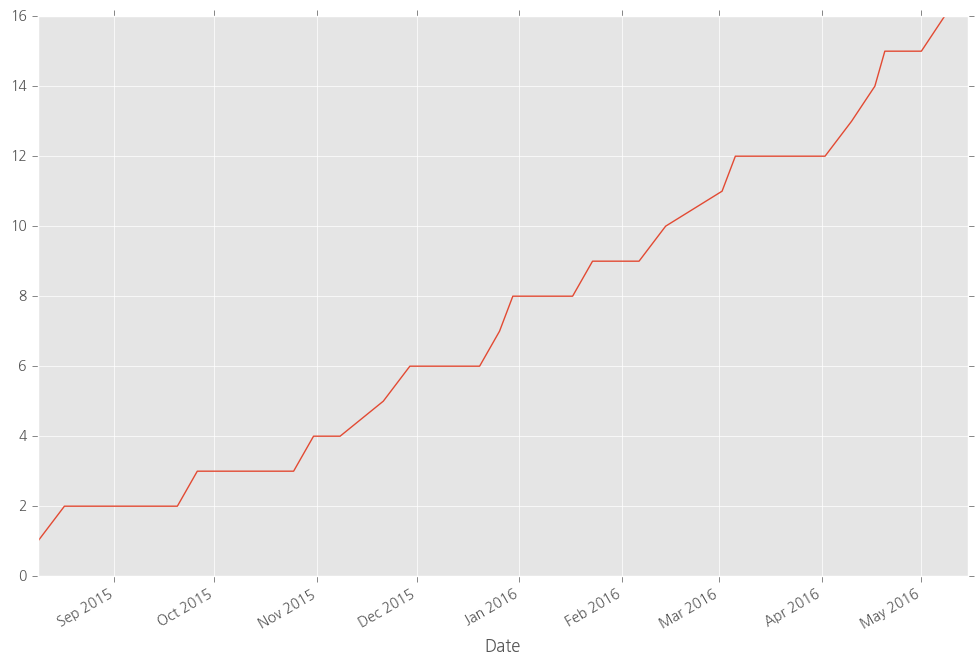

In [49]:
# 누적 승리 그래프
df_team['CumWin'].plot()

#### Lost, CumLost 컬럼 생성

In [50]:
# Lost 컬럼 생성 ( 승: 0, 패: 1, 무승부: 0 )
df_team['Lost'] = df_team['FTR'].map({'W':0, 'L':1, 'D': 0})

In [51]:
# CumLost 컬럼 생성 ( 패배 누적 합계 )
df_team['CumLost'] = df_team['Lost'].cumsum()

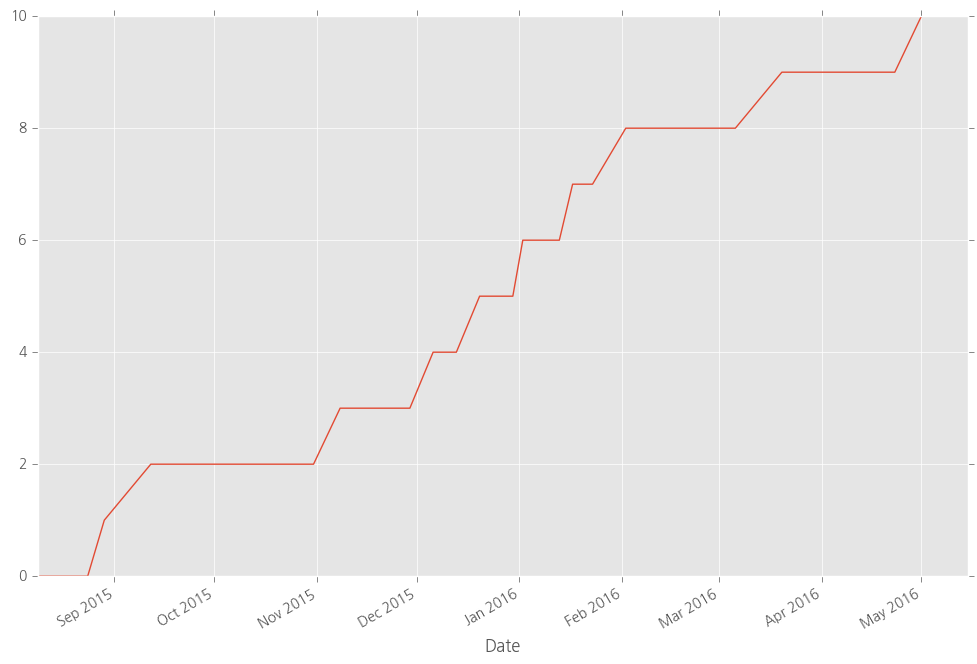

In [52]:
# 누적 패배 그래프
df_team['CumLost'].plot()

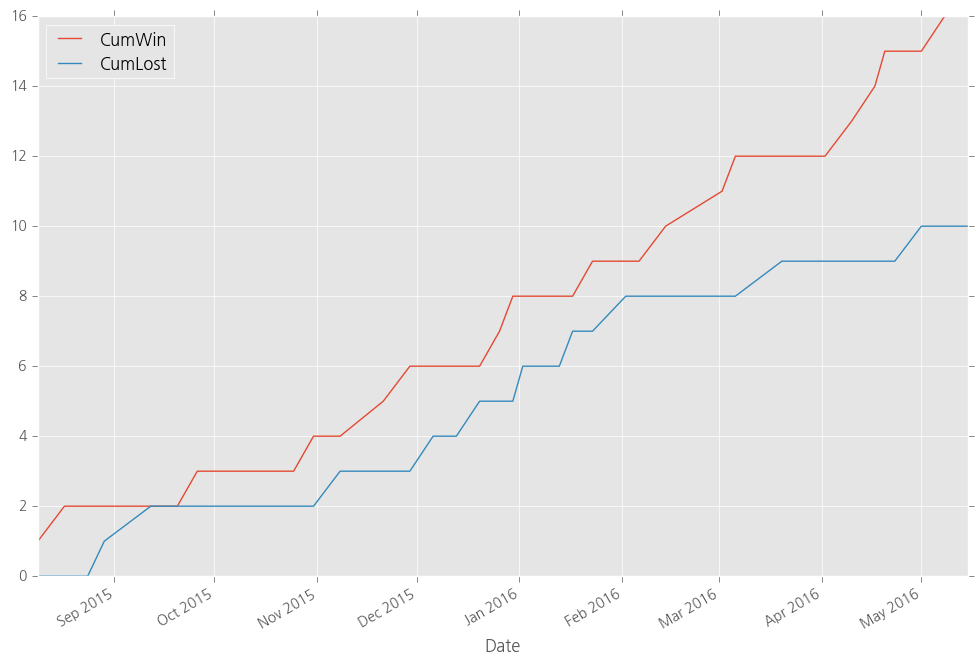

In [53]:
# 누적 승/패 그래프
df_team[['CumWin', 'CumLost']].plot()

#### Point, CumPoint 컬럼 생성

In [54]:
# Point 컬럼 생성 ( 승점 계산: W * 3 + D )
df_team['Point'] = df_team['FTR'].map({'W':3, 'L':0, 'D': 1})

In [55]:
# CumPoint 컬럼 생성 ( 승점 누적 합계 )
df_team['CumPoint'] = df_team['Point'].cumsum()

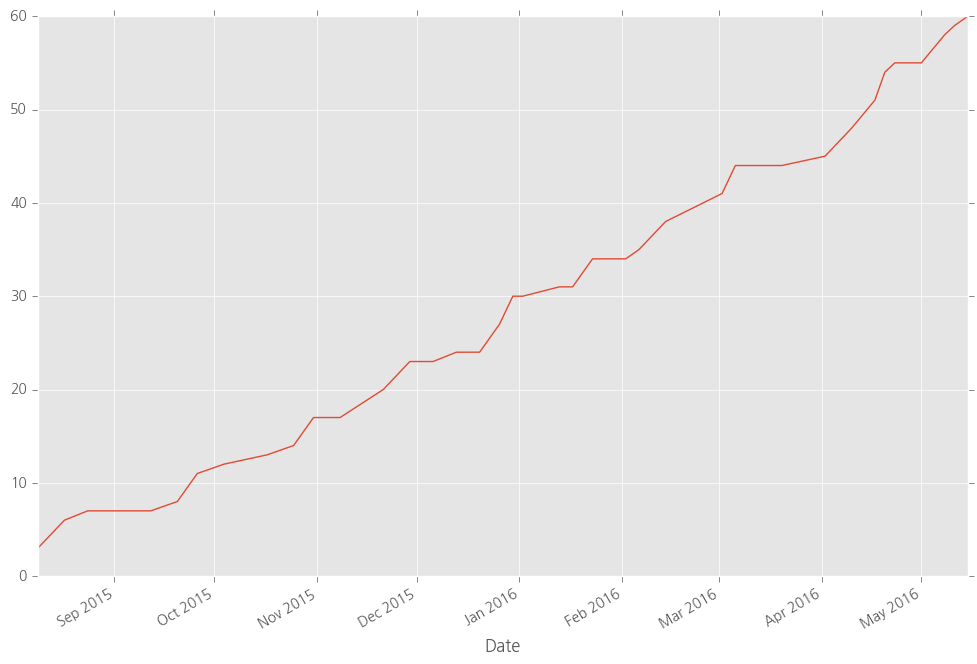

In [56]:
# 누적 승점 그래프
df_team['CumPoint'].plot()

---

##  3. 각 팀별 성적 집계 - 함수 이용

#### 성적 집계 함수 정의

In [57]:
def team_analysis(df, team_name):

    df_w = df
    
    #----------------------------------------------------------------------------
    # 입력된 team 데이터 로드
    #----------------------------------------------------------------------------
    # Home, Away team 로드
    df_home = df_w[df_w['HomeTeam'] == team_name]
    df_away = df_w[df_w['AwayTeam'] == team_name]

    # 승, 패 처리 함수 정의
    def result(x, home):
        if x == 'H':
            if home: return 'W'
            else:    return 'L'
        elif x == 'A':
            if home: return 'L'
            else:    return 'W'
        else:
            return x
    
    #----------------------------------------------------------------------------
    # team 별 데이터 처리
    #----------------------------------------------------------------------------
    # 컬럼 이름 수정
    df_home = df_home.rename(columns={'AwayTeam':'Opponent', 'FTHG':'득점', 'FTAG':'실점' })
    df_away = df_away.rename(columns={'HomeTeam':'Opponent', 'FTHG':'실점', 'FTAG':'득점' })
    
    # 승, 패 처리
    df_home['FTR'] = df_home['FTR'].apply(result, home=True)
    df_away['FTR'] = df_away['FTR'].apply(result, home=False)


    #----------------------------------------------------------------------------
    # 데이터 통합처리 ( Home + Away )
    #----------------------------------------------------------------------------
    # Merge ( Home + Away )
    df_team = pd.merge(df_home, df_away, how='outer')
    
    # 컬럼 삭제
    df_team.drop(['HomeTeam', 'AwayTeam'], axis=1, inplace=True)

    # Date 타입 변경 ( str --> datetime )
    df_team['Date'] = pd.to_datetime(df_team['Date'], format="%Y-%m-%d")

    # 날짜별 정렬
    df_team.sort_values('Date', inplace=True)
    
    # 날짜로 인덱스 설정
    df_team.set_index('Date', inplace=True)
    

    #----------------------------------------------------------------------------
    # 집계 컬럼 생성
    #----------------------------------------------------------------------------
    # Win, CumWin 컬럼 생성
    df_team['Win'] = df_team['FTR'].map({'W':1, 'L':0, 'D': 0})
    df_team['CumWin'] = df_team['Win'].cumsum()

    # Lost, CumLost 컬럼 생성
    df_team['Lost'] = df_team['FTR'].map({'W':0, 'L':1, 'D': 0})
    df_team['CumLost'] = df_team['Lost'].cumsum()

    # Point, CumPoint 컬럼 생성
    df_team['Point'] = df_team['FTR'].map({'W':3, 'L':0, 'D': 1})
    df_team['CumPoint'] = df_team['Point'].cumsum()
    
    df_team.name = team_name
    
    return df_team

#### 각 팀별 성적 집계

In [58]:
# 레스터 시티
leicester = team_analysis(df_w, 'Leicester')
leicester

,Opponent,득점,실점,FTR,Win,CumWin,Lost,CumLost,Point,CumPoint
Date,,,,,,,,,,
2015-08-08,Sunderland,4,2,W,1,1,0,0,3,3
2015-08-15,West Ham,2,1,W,1,2,0,0,3,6
2015-08-22,Tottenham,1,1,D,0,2,0,0,1,7
2015-08-29,Bournemouth,1,1,D,0,2,0,0,1,8
2015-09-13,Aston Villa,3,2,W,1,3,0,0,3,11
2015-09-19,Stoke,2,2,D,0,3,0,0,1,12
2015-09-26,Arsenal,2,5,L,0,3,1,1,0,12
2015-10-03,Norwich,2,1,W,1,4,0,1,3,15
2015-10-17,Southampton,2,2,D,0,4,0,1,1,16


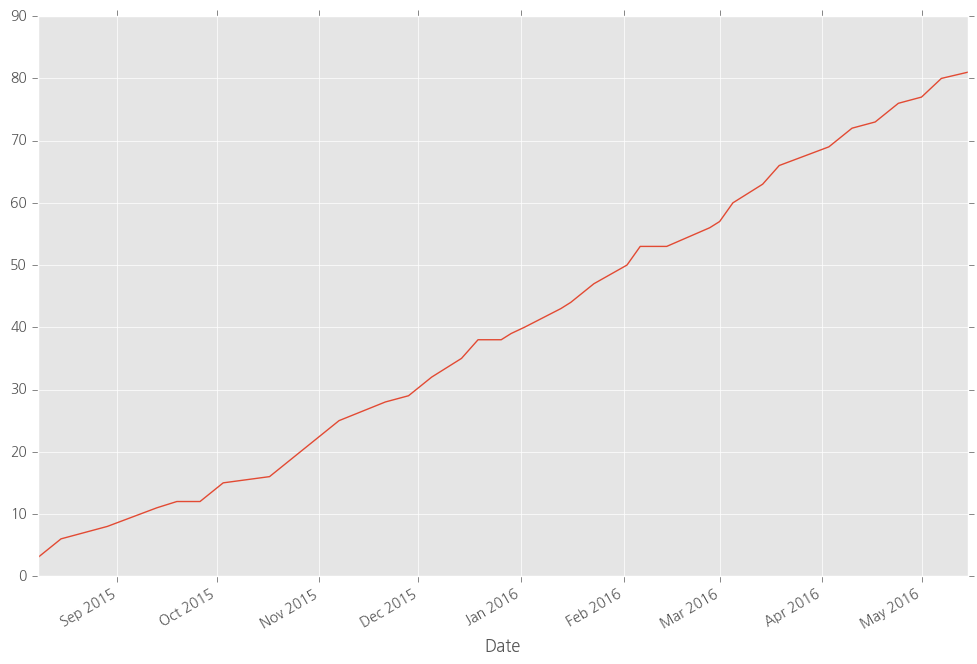

In [59]:
leicester['CumPoint'].plot()

In [60]:
# 첼시
chelsea = team_analysis(df_w, 'Chelsea')
chelsea.index.name = 'Date'
chelsea.head()

,Opponent,득점,실점,FTR,Win,CumWin,Lost,CumLost,Point,CumPoint
Date,,,,,,,,,,
2015-08-08,Swansea,2,2,D,0,0,0,0,1,1
2015-08-16,Man City,0,3,L,0,0,1,1,0,1
2015-08-23,West Brom,3,2,W,1,1,0,1,3,4
2015-08-29,Crystal Palace,1,2,L,0,1,1,2,0,4
2015-09-12,Everton,1,3,L,0,1,1,3,0,4


In [61]:
#import openpyxl

In [62]:
# 파일 저장
chelsea.to_excel('data/chelsea.xlsx')

#### 여러 팀 성적 집계

In [63]:
# 처리할 팀 리스트
teams = ['Chelsea', 'Liverpool', 'Arsenal', 'Leicester']

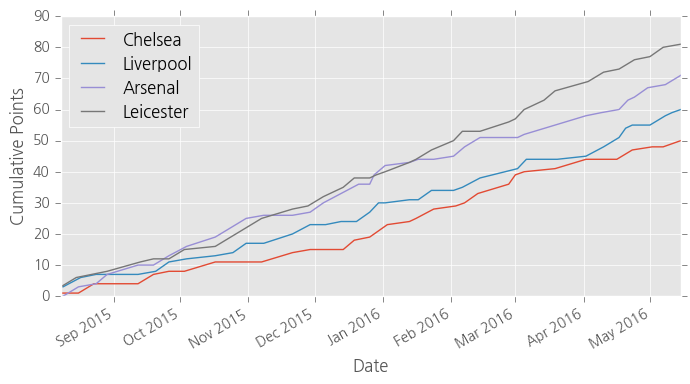

In [64]:
plt.figure(figsize=(8,4))

for t in teams:
    # 누적 승점 그래프
    df = team_analysis(df_w, t)['CumPoint']
    df.plot(label=t)


plt.legend(loc='best')
plt.ylabel('Cumulative Points')

---

In [ ]:
# end of file